## Support Vector Machines

This document records the contents related to the first presentation on Support Vector Machines (SVM) in the mathematics seminar, including figures, code, and textual explanations. 

The primary reference for this presentation is the book *An Introduction to Statistical Learning with Applications in R* by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 


### Introduction

In the broad field of machine learning, **regression** and **classification** are two core supervised learning tasks, aimed at solving different types of problems.

- **Regression** is used to model the relationship between a dependent variable and one or more independent variables. Common regression methods include linear regression, ridge regression, and LASSO regression.  
- **Classification** aims to assign data points to predefined categories. Common classification algorithms include logistic regression, decision trees, random forests, and Support Vector Machines (SVM).

In practice, datasets can be divided into **training set**, **validation set**, and **test set** in the ratio of **60%**, **10%**, and **30%**, respectively.  
- The **training set** is used to compute the necessary parameters within the model;  
- The **validation set** is used to tune the hyperparameters of the model;  
- Finally, the trained model is applied to the **test set** to evaluate its performance.

The data in this document defaults to the **training set**, and if **validation set** or **test set** is involved, it will be explicitly noted.

SVM was initially proposed to solve classification problems, particularly binary classification.

Starting from the simplest training sample complexity, the following lists the binary classification data scenarios in three dimensions:

In [1]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from PIL import Image

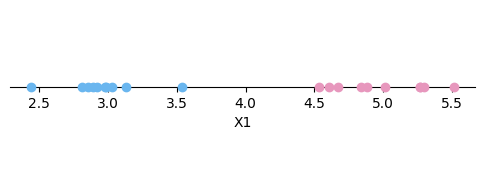

In [2]:
fig1 = plt.figure(figsize=(6, 2))
x1_class0 = np.load('.\\data\\x1_class0_data.npy')  
x1_class1 = np.load('.\\data\\x1_class1_data.npy')  

plt.scatter(x1_class0, np.zeros_like(x1_class0), color='#6ab6ef', label='Class 0',zorder=3)
plt.scatter(x1_class1, np.zeros_like(x1_class1), color='#e797bd', label='Class 1',zorder=3)
plt.xlabel('X1')
plt.yticks([])  

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)  
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['bottom'].set_zorder(0)
plt.show()


For the one-dimensional case, we can observe that the training samples are distributed along the number axis. **Blue** and **pink** are used to distinguish data points of different classes;  
- The label of **blue points** is recorded as **-1**;  
- The label of **pink points** is recorded as **1**.

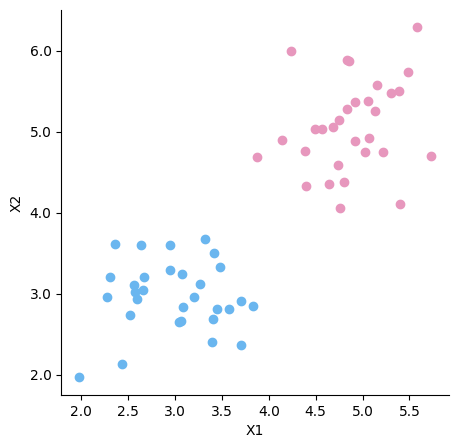

In [3]:
fig2 = plt.figure(figsize=(5, 5))
x2_class0 = np.load('.\\data\\x2_class0_data.npy') 
x2_class1 = np.load('.\\data\\x2_class1_data.npy')  
plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.show()


For the two-dimensional case, the training samples are distributed on a plane.

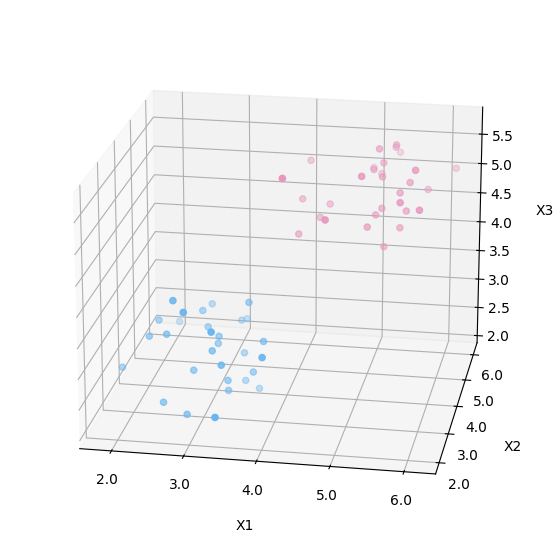

In [4]:
fig3 = plt.figure(figsize=(6, 6))  
ax = fig3.add_subplot(111, projection='3d')

x3_class0 = np.load('.\\data\\x3_class0_data.npy')
x3_class1 = np.load('.\\data\\x3_class1_data.npy')

ax.scatter(x3_class0[:, 0], x3_class0[:, 1], x3_class0[:, 2], color='#6ab6ef', label='Class 0')
ax.scatter(x3_class1[:, 0], x3_class1[:, 1], x3_class1[:, 2], color='#e797bd', label='Class 1')

ax.set_xlabel('X1', labelpad=12)
ax.set_ylabel('X2', labelpad=12)
ax.set_zlabel('X3', labelpad=15)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.view_init(elev=20, azim=-80) 
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.show()

It can be found through analysis that classifying the training samples of the three dimensions mentioned above is not a difficult task. We can directly utilize the linear decision boundary to effectively separate these samples.

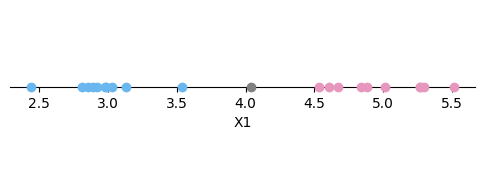

In [5]:
fig4 = plt.figure(figsize=(6, 2)) 

sorted_data = np.concatenate([x1_class0, x1_class1])
sorted_data = np.sort(sorted_data)

decision_boundary = (np.max(x1_class0) + np.min(x1_class1)) / 2

plt.scatter(x1_class0, np.zeros_like(x1_class0), color='#6ab6ef', label='Class 0',zorder=3)
plt.scatter(x1_class1, np.zeros_like(x1_class1), color='#e797bd', label='Class 1',zorder=3)
plt.scatter(decision_boundary, np.zeros_like(decision_boundary), color='grey',zorder=3)
plt.xlabel('X1')
plt.yticks([])  

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['left'].set_visible(False)
  
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['bottom'].set_zorder(0)
plt.show()

In the case of a one-dimensional example, we can directly select any point within the region between the maximum blue point and the minimum pink point, and use this point as the dividing point for the partitioning operation.

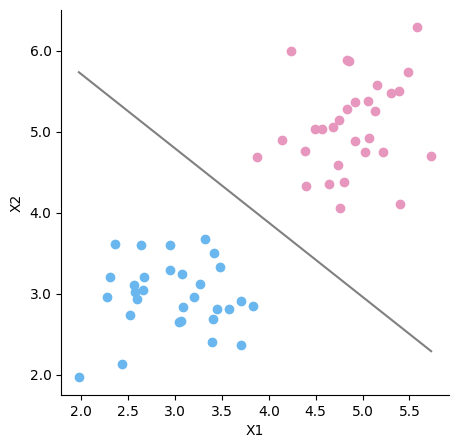

In [6]:
fig5 = plt.figure(figsize=(5, 5))

X = np.vstack((x2_class0, x2_class1))
y = np.hstack((np.zeros(len(x2_class0)), np.ones(len(x2_class1))))

model = LogisticRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_[0]

m = -(coef[0] / coef[1])
b = -(intercept / coef[1])

x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='grey', label='Decision Boundary')

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)  
plt.show()

In the two-dimensional example, a linear first-order function can also be found to separate the two types of data points. In this process, the logistic regression method is used to find the corresponding coefficients.

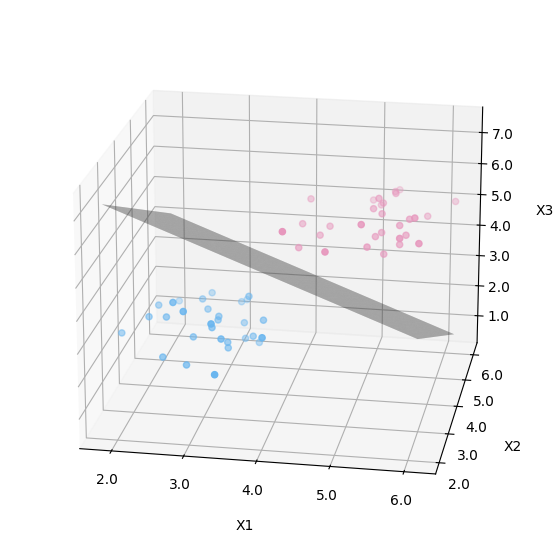

In [7]:
fig6 = plt.figure(figsize=(6, 6))  
ax = fig6.add_subplot(111, projection='3d')

X = np.vstack((x3_class0, x3_class1))
y = np.hstack((np.zeros(len(x3_class0)), np.ones(len(x3_class1))))

model = LogisticRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_[0]

ax.scatter(x3_class0[:, 0], x3_class0[:, 1], x3_class0[:, 2], color='#6ab6ef', label='Class 0')
ax.scatter(x3_class1[:, 0], x3_class1[:, 1], x3_class1[:, 2], color='#e797bd', label='Class 1')

x1_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 50)
x2_vals = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 50)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
X3 = -(coef[0]*X1 + coef[1]*X2 + intercept) / coef[2]
ax.plot_surface(X1, X2, X3, alpha=0.5, color='grey')

ax.set_xlabel('X1', labelpad=12)
ax.set_ylabel('X2', labelpad=12)
ax.set_zlabel('X3', labelpad=15)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.view_init(elev=20, azim=-80)  
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.show()

Similarly, for this easily separable training dataset, we can find a plane in three-dimensional space to separate the two classes of data points. Here, logistic regression is used to determine the coefficients.

Based on the analysis of the above three examples, it can be known that for the classification task of some training samples, a relatively simple method is to use the linear decision boundary to partition the data points.

We define this linear decision boundary as the "hyperplane".

In a $p$-dimensional space, the dimension of the hyperplane is $p - 1$, and its mathematical expression is: $$\beta_0+\beta_1 X_1+\beta_2 X_2 +\cdots+\beta_p X_p =0$$

This hyperplane will divide the $p$-dimensional space into two parts. One part satisfies: $$\beta_0+\beta_1 X_1+\beta_2 X_2 +\cdots+\beta_p X_p > 0$$

And the other part satisfies: $$\beta_0+\beta_1 X_1+\beta_2 X_2 +\cdots+\beta_p X_p < 0$$

Therefore, for the data points in the test set, by substituting the coordinates of the point into the above expression and then comparing the obtained result with 0, we can determine the classification attribution of the data point.

Taking the previously mentioned two-dimensional data training set as an example, the expression of the dividing line is calculated as: $$7.54 - 0.92 X_1 - X_2 = 0$$

 The pink area corresponds to the part where $7.54 - 0.92 X_1 - X_2 > 0$, and the blue area corresponds to the part where $7.54 - 0.92 X_1 - X_2 < 0$.


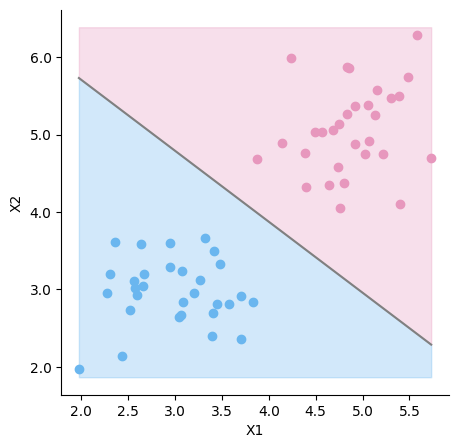

In [8]:
fig7 = plt.figure(figsize=(5, 5))

y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='grey', label='Decision Boundary')

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

max_y = np.max(x2_class1[:, 1])
min_y = np.min(x2_class0[:, 1])

plt.fill_between(x_vals, y_vals, min_y-0.1, where=min_y-0.1< m * x_vals + b, color='#6ab6ef', alpha=0.3)
plt.fill_between(x_vals, y_vals, max_y+0.1, where=max_y+0.1> m * x_vals + b, color='#e797bd', alpha=0.3)

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.show()

If we observe the training samples of this two-dimensional data carefully, we can find that the following hyperplane can also separate the two types of data. Then, how should we choose a more appropriate linear decision boundary? 

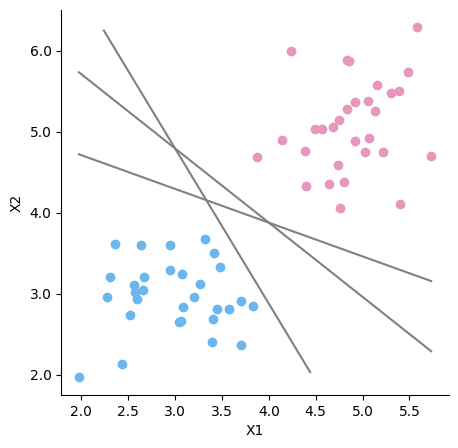

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

y_vals_2 = (m + 0.5) * x_vals + b - 2
y_vals_3 = (m - 1) * x_vals + b + 3

valid_indices = np.where((y_vals_3 >= min_y) & (y_vals_3 <= max_y))

valid_x = x_vals[valid_indices]
valid_y = y_vals_3[valid_indices]

plt.plot(x_vals, y_vals, color='grey')
plt.plot(x_vals, y_vals_2, color='grey')
plt.plot(valid_x, valid_y, color='grey')

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.show()

### Maximum Margin Classifier

#### Margin and Support Vector

We will continue to use two-dimensional training samples to introduce margin and support vector.

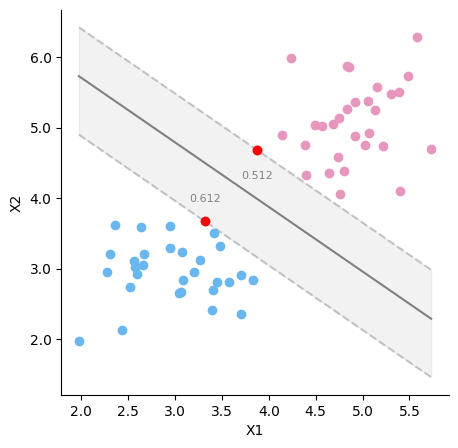

In [10]:
plt.figure(figsize=(5, 5))

def distance_to_line(x, y, m, b):
    A = m
    B = -1
    C = b
    return np.abs(A * x + B * y + C) / np.sqrt(A**2 + B**2)

distances_class0 = distance_to_line(x2_class0[:, 0], x2_class0[:, 1], m, b)
closest_index_class0 = np.argmin(distances_class0)
closest_point_class0 = x2_class0[closest_index_class0]

distances_class1 = distance_to_line(x2_class1[:, 0], x2_class1[:, 1], m, b)
closest_index_class1 = np.argmin(distances_class1)
closest_point_class1 = x2_class1[closest_index_class1]

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

plt.scatter(closest_point_class0[0], closest_point_class0[1], color='red',label='Closest to line (Class 0)')
plt.scatter(closest_point_class1[0], closest_point_class1[1], color='red',label='Closest to line (Class 1)')

y_sv_0 = m * (x_vals - closest_point_class0[0]) + closest_point_class0[1] 

y_sv_1 = m * (x_vals - closest_point_class1[0]) + closest_point_class1[1] 

plt.plot(x_vals, y_vals, color='grey')
plt.plot(x_vals, y_sv_0, color='grey', alpha=0.4, zorder=0, linestyle='--')
plt.plot(x_vals, y_sv_1, color='grey', alpha=0.4, zorder=0, linestyle='--')
plt.fill_between(x_vals, y_sv_0, y_sv_1, color='grey', alpha=0.1, zorder=0)

plt.annotate(round(np.min(distances_class0), 3),
             xy=(closest_point_class0[0], closest_point_class0[1]),
             xytext=(0, 20),
             textcoords="offset points",
             ha='center', va='top',
             fontsize=8, color='grey')
plt.annotate(round(np.min(distances_class1), 3),
             xy=(closest_point_class1[0], closest_point_class1[1]),
             xytext=(0, -15),
             textcoords="offset points",
             ha='center', va='top',
             fontsize=8, color='grey')

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.show()


For the given linear decision boundary $H$, we search for the set of points closest to $H$ respectively among the two types of data points, and such a set of points is called the support vector. In the above figure, the support vectors are the two points marked in red.

The shortest distance from the support vector to the linear decision boundary $H$ is defined as the margin. In the above figure, the smaller value of the distances is selected as the margin. Therefore, the value of the margin of the linear decision boundary in the figure is $0.512$.

Given that the support vectors have been determined in the above figure, in order to separate the two types of data points as effectively as possible, we expect that the distance length from the support vectors to the linear decision boundary $H$ is as large as possible. Therefore, in the context of this figure, the linear decision boundary $H$ can be translated downward so that the distance lengths from the support vectors of the two types of data to $H$ are equal.


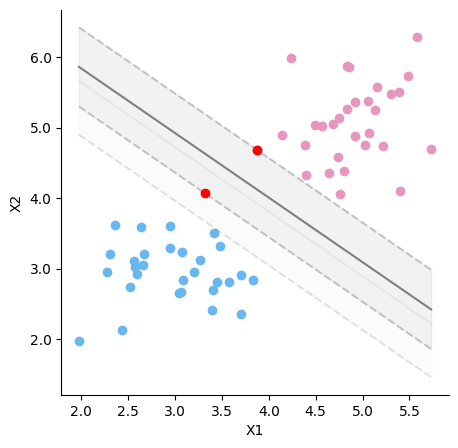

In [11]:
plt.figure(figsize=(5, 5))

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

plt.scatter(closest_point_class0[0], closest_point_class0[1], color='white',s=100, label='Closest to line (Class 0)')
plt.scatter(closest_point_class0[0], closest_point_class0[1]+0.4, color='red', label='Closest to line (Class 1)')
plt.scatter(closest_point_class1[0], closest_point_class1[1], color='red', label='Closest to line (Class 1)')

y_sv_0 = m * (x_vals - closest_point_class0[0]) + closest_point_class0[1] 
y_sv_0_change = m * (x_vals - closest_point_class0[0]) + closest_point_class0[1] + 0.4
y_sv_1 = m * (x_vals - closest_point_class1[0]) + closest_point_class1[1] 

y_vals = 0.5 * (y_sv_0 + y_sv_1)
plt.plot(x_vals, y_vals, color='grey', alpha=0.1)

y_vals = 0.5 * (y_sv_0_change + y_sv_1)

plt.plot(x_vals, y_vals, color='grey')
plt.plot(x_vals, y_sv_0, color='grey', alpha=0.2, linestyle='--')
plt.plot(x_vals, y_sv_0_change, color='grey', alpha=0.4, linestyle='--', zorder=0)
plt.plot(x_vals, y_sv_1, color='grey', alpha=0.4, linestyle='--', zorder=0)
plt.fill_between(x_vals, y_vals, y_sv_1, color='grey', alpha=0.1, zorder=0)
plt.fill_between(x_vals, y_sv_0_change, y_vals, color='grey', alpha=0.07, zorder=0)
plt.fill_between(x_vals, y_sv_0, y_vals, color='grey', alpha=0.03)

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 
plt.show()


These support vectors play a "supporting" role for the maximum margin hyperplane. The implication is that if these support vector points experience slight positional displacements, then the corresponding maximum margin hyperplane will also shift accordingly. It is worth noting that the maximum margin hyperplane is directly determined by the support vectors and has nothing to do with other data observation points. In other words, the positional changes of any other data observation points will not have an impact on the hyperplane used for separating the data.

#### The Construction of the Maximum Margin Classifier

According to the preceding example, we can adopt an intuitive segmentation method: searching for a hyperplane that maximizes the margin; this is also the fundamental idea of the maximum margin classifier.

Considering $n$ training observations:  $x_1, x_2, ..., x_n \in \mathbb{R}^p$  and their corresponding labels:  $y_1, y_2, ..., y_n \in \{-1, 1\}$  

In short, the maximum margin hyperplane is the solution to the following optimization problem:

$\max_{\beta_0,\beta_1,\beta_2,...,\beta_p}{M}$

$subject\quad to\quad \sum_{j=1}^p\beta_j^2 =1,$

$y_i(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+...+\beta_p x_{ip})\ge M\quad \forall i=1,...,n$

The objective function aims to maximize the margin. The equality constraint normalizes the coefficients of the expression for the maximum margin hyperplane, ensuring that the distance from data points to the hyperplane $\frac{|\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+...+\beta_p x_{ip}|}{\sqrt{\sum_{j=1}^p\beta_j^2}}$ remains invariant to the scaling of $\beta_i$, thereby allowing $M$ to directly represent the margin as the perpendicular distance between the support vectors and the hyperplane. The inequality constraint stipulates that the distance from all training samples to the maximum margin hyperplane must be greater than or equal to the margin, ensuring correct classification of the sample points.

We can utilize the method of Lagrange multipliers to solve the optimization problem of the maximum margin hyperplane:

Let $\lambda$ be the Lagrange multiplier for the constraint $\sum_{j=1}^p{\beta_j^2 =1}$, and let $\mu_i$ be the Lagrange multiplier for the constraint $y_i(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+...+\beta_p x_{ip})\ge M$, with $\mu_i\ge 0$.

The Lagrangian function is defined as:
$$
\mathcal{L}(M,\beta_0,\boldsymbol{\beta},\lambda,\boldsymbol{\mu}) = -M+\lambda\left(\sum_{j = 1}^{p}\beta_j^2 - 1\right)+\sum_{i = 1}^{n}\mu_i\left[-y_i\left(\beta_0+\boldsymbol{\beta}\cdot x_{i}\right)+M\right]
$$
where $\boldsymbol{\beta}=(\beta_1,...,\beta_p)^T$ and $\boldsymbol{\mu}=(\mu_1,...,\mu_n)^T$.

Taking the partial derivative with respect to $M$:
$$
\frac{\partial \mathcal{L}}{\partial M}=-1+\sum_{i = 1}^{n}\mu_i=0 \quad \Rightarrow \quad \sum_{i = 1}^{n}\mu_i=1
$$

Taking the partial derivative with respect to $\beta_0$:
$$
\frac{\partial \mathcal{L}}{\partial \beta_0}=\sum_{i = 1}^{n}\mu_i y_i=0
$$

Taking the partial derivative with respect to $\beta_j$ ($j=1,2,...,p$):
$$
\frac{\partial \mathcal{L}}{\partial \beta_j}=2\lambda\beta_j+\sum_{i = 1}^{n}\mu_i y_i x_{ij}=0 \quad \Rightarrow \quad \beta_j=-\frac{1}{2\lambda}\sum_{i = 1}^{n}\mu_i y_i x_{ij}
$$

Taking the partial derivative with respect to $\lambda$:
$$
\frac{\partial \mathcal{L}}{\partial \lambda}=\sum_{j = 1}^{p}\beta_j^2 - 1=0
$$

Taking the partial derivative with respect to $\mu_i$ ($i=1,2,...,n$):
$$
\frac{\partial \mathcal{L}}{\partial\mu_i}=y_i\left(\beta_0+\boldsymbol{\beta}\cdot x_{i}\right)-M=0 \quad \Rightarrow \quad y_i\left(\beta_0+\boldsymbol{\beta}\cdot x_{i}\right)=M
$$

Substituting the expression for $\beta_j$ into the constraint $\sum_{j = 1}^{p}\beta_j^2=1$:
$$
\frac{1}{4\lambda^2}\sum_{j=1}^{p}\left(\sum_{i = 1}^{n}\mu_i y_i x_{ij}\right)^2=1 \quad \Rightarrow \quad \lambda=\frac{1}{2}\sqrt{\sum_{j=1}^{p}\left(\sum_{i = 1}^{n}\mu_i y_i x_{ij}\right)^2}
$$
Solving for $\beta_j$:
$$
\beta_j=\frac{-\sum_{i = 1}^{n}\mu_i y_i x_{ij}}{\sqrt{\sum_{j=1}^{p}\left(\sum_{i = 1}^{n}\mu_i y_i x_{ij}\right)^2}}
$$

Thus, the equation of the desired hyperplane can be written as:
$$
f(\boldsymbol{x})=\beta_0+\beta_1 \boldsymbol{x_1}+\beta_2 \boldsymbol{x_2} +...+\beta_p \boldsymbol{x_p}=\beta_0 -\sum_{i = 1}^{n}\frac{\mu_i y_i}{\sqrt{\sum_{j=1}^{p}\left(\sum_{i = 1}^{n}\mu_i y_i x_{ij}\right)^2}} \langle\boldsymbol{x},x_i\rangle
$$
where $\boldsymbol{x}=(\boldsymbol{x_1},...,\boldsymbol{x_p})$.

#### The Non-separable Case

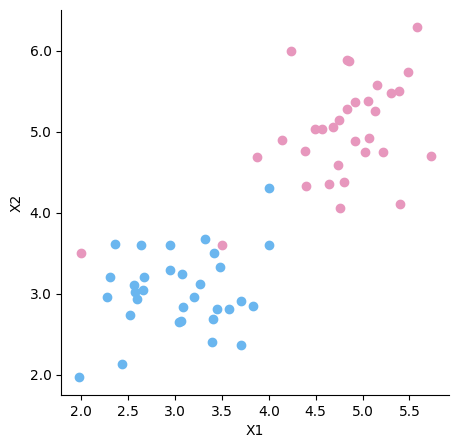

In [12]:
plt.figure(figsize=(5, 5))

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0', zorder=1)
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1', zorder=1)

plt.scatter([4,4],[3.6,4.3], color='#6ab6ef')
plt.scatter([2,3.5],[3.5,3.6], color='#e797bd')

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)
plt.show()


In this scenario, due to the presence of outliers, the two classes cannot be perfectly separated by a hyperplane, thus rendering the maximum margin classifier inapplicable.

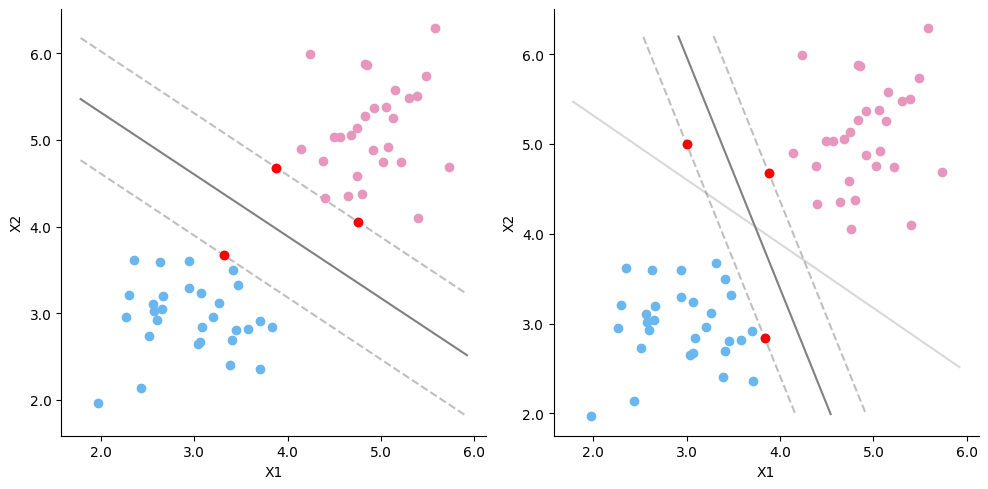

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

X = np.vstack((x2_class0, x2_class1))
y = np.hstack((np.zeros(len(x2_class0)), np.ones(len(x2_class1))))

clf = svm.SVC(kernel='linear', C=1e6) 
clf.fit(X, y)

axes[0].scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0')
axes[0].scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

w = clf.coef_[0]
b = clf.intercept_[0]

x_min, x_max = axes[0].get_xlim()
xx = np.linspace(x_min, x_max, 100)
yy = (-w[0] / w[1]) * xx - b / w[1]

margin = 1 / np.linalg.norm(w)
yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

axes[0].plot(xx, yy, color='grey', label='Decision Boundary', zorder=0)
axes[0].plot(xx, yy_down, color='grey', linestyle='--', alpha=0.5, label='Margin', zorder=0)
axes[0].plot(xx, yy_up, color='grey', linestyle='--', alpha=0.5, zorder=0)

axes[0].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color='red', facecolors='red', label='Support Vectors')

axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes[0].spines['top'].set_visible(False) 
axes[0].spines['right'].set_visible(False) 

new_point = np.array([[3, 5]])
x2_class0_new = np.vstack((x2_class0, new_point))

X_new = np.vstack((x2_class0_new, x2_class1))
y_new = np.hstack((np.zeros(len(x2_class0_new)), np.ones(len(x2_class1))))

clf_new = svm.SVC(kernel='linear', C=1e6) 
clf_new.fit(X_new, y_new)

axes[1].scatter(x2_class0_new[:, 0], x2_class0_new[:, 1], color='#6ab6ef', label='Class 0')
axes[1].scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1')

w_new = clf_new.coef_[0]
b_new = clf_new.intercept_[0]

x_min_new, x_max_new = axes[1].get_xlim()
xx_new = np.linspace(x_min_new, x_max_new, 100)
yy_new = (-w_new[0] / w_new[1]) * xx_new - b_new / w_new[1]

margin_new = 1 / np.linalg.norm(w_new)
yy_down_new = yy_new - np.sqrt(1 + (w_new[0] / w_new[1]) ** 2) * margin_new
yy_up_new = yy_new + np.sqrt(1 + (w_new[0] / w_new[1]) ** 2) * margin_new

valid_indices_yy_new = np.where((yy_new >= min_y) & (yy_new <= max_y))
valid_indices_yy_down_new = np.where((yy_down_new >= min_y) & (yy_down_new <= max_y))
valid_indices_yy_up_new = np.where((yy_up_new >= min_y) & (yy_up_new <= max_y))

axes[1].plot(xx, yy, color='grey', label='Decision Boundary', alpha=0.3, zorder=0)
axes[1].plot(xx_new[valid_indices_yy_new], yy_new[valid_indices_yy_new], color='grey', label='Decision Boundary New', zorder=0)
axes[1].plot(xx_new[valid_indices_yy_down_new], yy_down_new[valid_indices_yy_down_new], color='grey', linestyle='--', alpha=0.5, label='Margin New', zorder=0)
axes[1].plot(xx_new[valid_indices_yy_up_new], yy_up_new[valid_indices_yy_up_new], color='grey', linestyle='--', alpha=0.5, zorder=0)

axes[1].scatter(clf_new.support_vectors_[:, 0], clf_new.support_vectors_[:, 1], color='red', facecolors='red', label='Support Vectors')

axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')

axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes[1].spines['top'].set_visible(False)  
axes[1].spines['right'].set_visible(False)  

plt.tight_layout()
plt.show()

The maximum margin classifier is highly sensitive to the training data. From the left figure to the right figure, the addition of just one new data point significantly alters the resulting separating hyperplane.

Building on the concept of the maximum margin classifier, we can propose the following directions for improvement:

- Greater robustness to individual observations, and
- Better classification of *most* of the training observations.

This suggests that, in order to classify the remaining observations more effectively, it may be worthwhile to allow for the misclassification of some training observations.

As we will see in the next section, we can extend the concept of the separating hyperplane by introducing what is known as a "soft margin" to develop a hyperplane that almost separates the classes. The generalization of the maximum margin classifier to non-separable cases is referred to as the support vector classifier.

### Support Vector Classifier

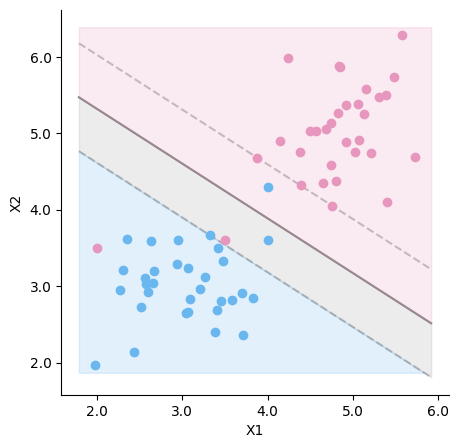

In [14]:
plt.figure(figsize=(5, 5))

plt.scatter(x2_class0[:, 0], x2_class0[:, 1], color='#6ab6ef', label='Class 0', zorder=1)
plt.scatter(x2_class1[:, 0], x2_class1[:, 1], color='#e797bd', label='Class 1', zorder=1)

plt.scatter([4,4],[3.6,4.3], color='#6ab6ef')
plt.scatter([2,3.5],[3.5,3.6], color='#e797bd')

plt.plot(xx, yy, color='grey', label='Decision Boundary', zorder=0)
plt.plot(xx, yy_down, color='grey', linestyle='--', alpha=0.5, zorder=0)
plt.plot(xx, yy_up, color='grey', linestyle='--', alpha=0.5, zorder=0)

plt.fill_between(xx, yy_down, min_y-0.1, where=min_y-0.1< yy_down, color='#6ab6ef', alpha=0.2, zorder=0)
plt.fill_between(xx, yy, yy_down, where=yy > yy_down, color='grey', alpha=0.15, zorder=0)
plt.fill_between(xx, yy, max_y+0.1, where=yy < max_y+0.1, color='#e797bd', alpha=0.2, zorder=0)

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False) 
plt.show()


From this figure, we can categorize the regions where outliers reside into the following: the correct side of the margin, the incorrect side of the margin, and the incorrect side of the hyperplane.

For the blue points, the correct side of the margin is highlighted with a blue background, the incorrect side of the margin is highlighted with a gray background, and the incorrect side of the hyperplane is highlighted with a pink background.

To address these outliers, we introduce a positive penalty coefficient and add a penalty term to the optimization problem of the maximum margin classifier:

$\max_{\beta_0,\beta_1,\beta_2,...,\beta_p,\epsilon_1,...,\epsilon_n}{M}$

$subject\quad to\quad \sum_{j=1}^p{\beta_j^2 =1},$

$y_i(\beta_0+\beta_1 x_{i1}+\beta_2 x_{i2}+...+\beta_p x_{ip})\ge M(1-\epsilon_i) \quad \forall i=1,...,n$

$\epsilon_i \ge 0,\quad \sum_{i=1}^{n}{\epsilon_i}\le C$

$\epsilon_i$ can indicate the relative position of an observation with respect to the margin: if $\epsilon_i=0$, the observation lies on the correct side of the margin; if $\epsilon_i>0$, the observation lies on the incorrect side of the margin; and if $\epsilon_i>1$, the observation lies on the incorrect side of the hyperplane.

The tuning parameter $C$ defines the sum of $\epsilon_i$ and is a hyperparameter in the model. Thus, it determines the number and severity of violations to the margin (and to the hyperplane) that we are willing to tolerate.

If $C=0$, all $\epsilon_i=0$, which aligns with the definition of the maximum margin classifier. In practice, we can determine an appropriate value for $C$ using k-fold cross-validation on a validation set.

The solution method for the support vector classifier is similar to that of the maximum margin classifier, and thus will not be elaborated further here.

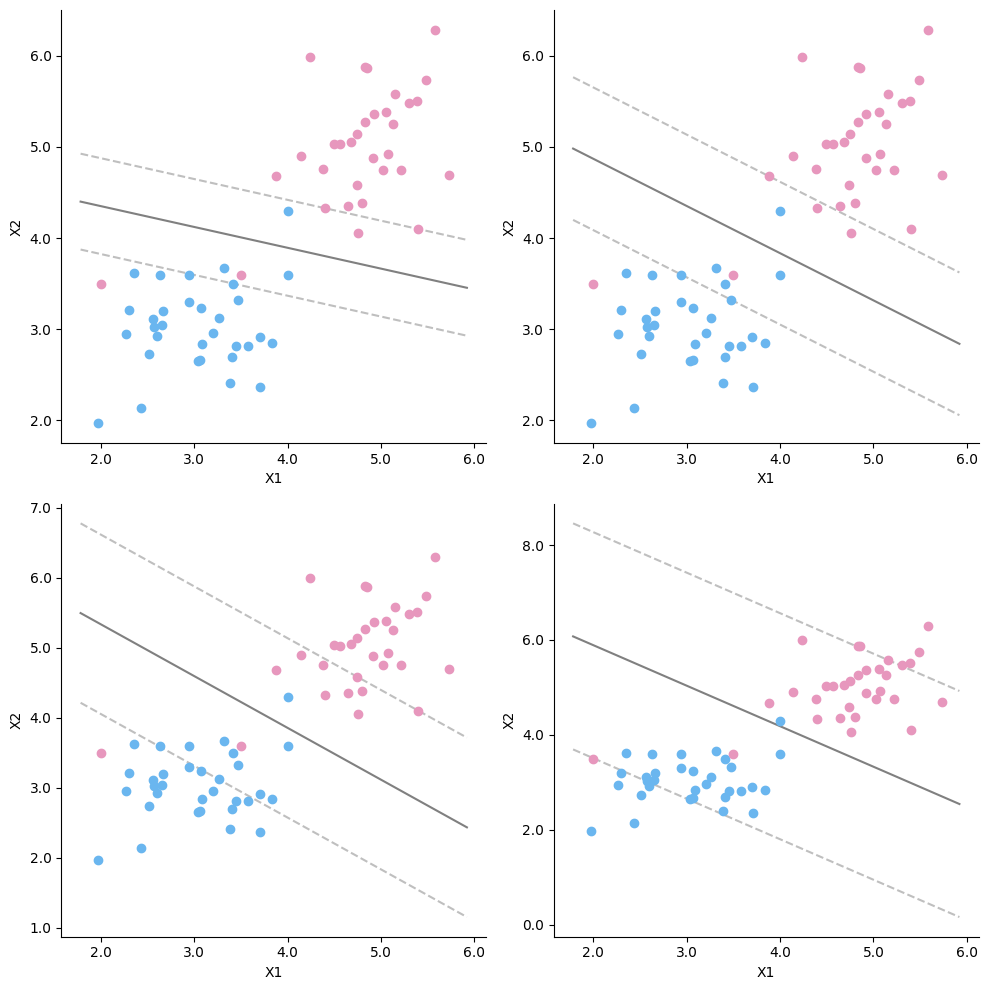

In [15]:
new_class0_points = np.array([[4, 3.6], [4, 4.3]])
new_class1_points = np.array([[2, 3.5], [3.5, 3.6]])
x2_class0_new = np.vstack((x2_class0, new_class0_points))
x2_class1_new = np.vstack((x2_class1, new_class1_points))

X = np.vstack((x2_class0_new, x2_class1_new))
y = np.hstack((np.zeros(len(x2_class0_new)), np.ones(len(x2_class1_new))))


C_values = [0.1, 1, 10, 100]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, C in enumerate(C_values):
    row = i // 2
    col = i % 2

    clf = svm.SVC(kernel='linear', C=1/C)
    clf.fit(X, y)

    axes[row, col].scatter(x2_class0_new[:, 0], x2_class0_new[:, 1], color='#6ab6ef', label='Class 0', zorder=1)
    axes[row, col].scatter(x2_class1_new[:, 0], x2_class1_new[:, 1], color='#e797bd', label='Class 1', zorder=1)

    w = clf.coef_[0]
    b = clf.intercept_[0]

    x_min, x_max = axes[row, col].get_xlim()
    xx = np.linspace(x_min, x_max, 100)
    yy = (-w[0] / w[1]) * xx - b / w[1]

    margin = 1 / np.linalg.norm(w)
    yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
    yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

    axes[row, col].plot(xx, yy, color='grey', label='Decision Boundary', zorder=0)
    axes[row, col].plot(xx, yy_down, color='grey', linestyle='--', alpha=0.5, zorder=0)
    axes[row, col].plot(xx, yy_up, color='grey', linestyle='--', alpha=0.5, zorder=0)

    axes[row, col].set_xlabel('X1')
    axes[row, col].set_ylabel('X2')

    axes[row, col].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes[row, col].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

When $C$ is small, we seek a narrow margin that is rarely violated; this corresponds to a classifier that fits the data closely, potentially resulting in low bias but high variance.

When $C$ is large, the margin is wider, and we allow more violations; this corresponds to fitting the data less closely, resulting in a classifier that may have higher bias but potentially lower variance.

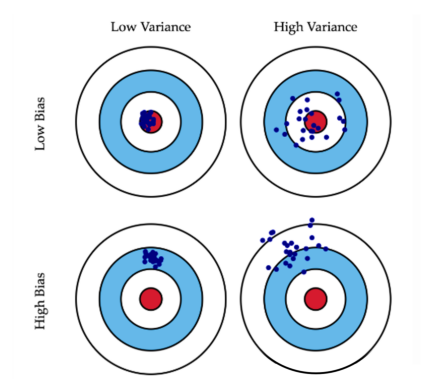

In [16]:
img = mpimg.imread('.\\picture\\bias and variance.png')

plt.imshow(img)
plt.axis('off')
fig = plt.gcf()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()


- **High Bias - Low Variance**:  
   In this case, the model is relatively simple and performs consistently across different training datasets. However, due to its limited fitting capability, there is a significant bias between predicted and true values, leading to underfitting. For example, when fitting a straight line to complex curve data, the linear model's performance remains poor regardless of changes in the training data, as it cannot capture the complex features of the data.

- **Low Bias - High Variance**:  
   The model fits the training data well, with minimal bias between predicted and true values. However, its performance varies significantly across different training datasets, leading to overfitting. For example, when using a high-degree polynomial model to fit a small number of data points, the model may perfectly pass through all training points but perform poorly on new data points.

- **High Bias - High Variance**:  
   This is the worst scenario, where the model neither fits the training data well nor exhibits stability, resulting in poor performance across different training datasets.

- **Low Bias - Low Variance**:  
   This is the ideal scenario, where the model fits the training data well, exhibits high stability, performs excellently across different training datasets, and makes accurate predictions on new data.

The selection of the hyperparameter $C$ has a significant impact on achieving the desired low bias-low variance outcome.

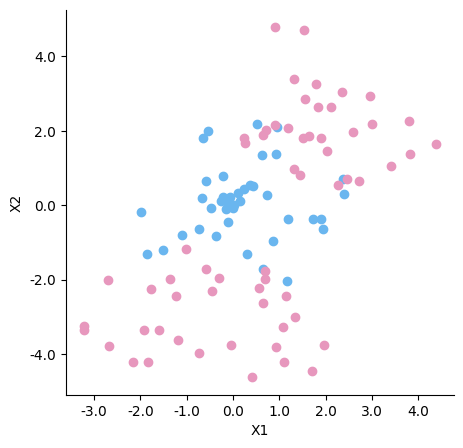

In [17]:
x4_class0=np.load('.\\data\\x4_class0_data.npy')
x4_class1=np.load('.\\data\\x4_class1_data.npy')

plt.figure(figsize=(5, 5))

plt.scatter(x4_class0[:, 0], x4_class0[:, 1], c='#6ab6ef', label='Class 0')
plt.scatter(x4_class1[:, 0], x4_class1[:, 1], c='#e797bd', label='Class 1')

plt.xlabel('X1')
plt.ylabel('X2')

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False) 
plt.show()


If the boundary between two classes is linear, the support vector classifier is a natural choice for classification in a binary class setting. However, in practice, we often encounter non-linear class boundaries. For example, as illustrated in the data above.

Clearly, the support vector classifier or any linear classifier performs poorly in such scenarios.

### Support Vector Machines

In the context of the support vector classifier, we can address potential non-linear boundaries between classes by expanding the feature space using functions of the predictor variables.

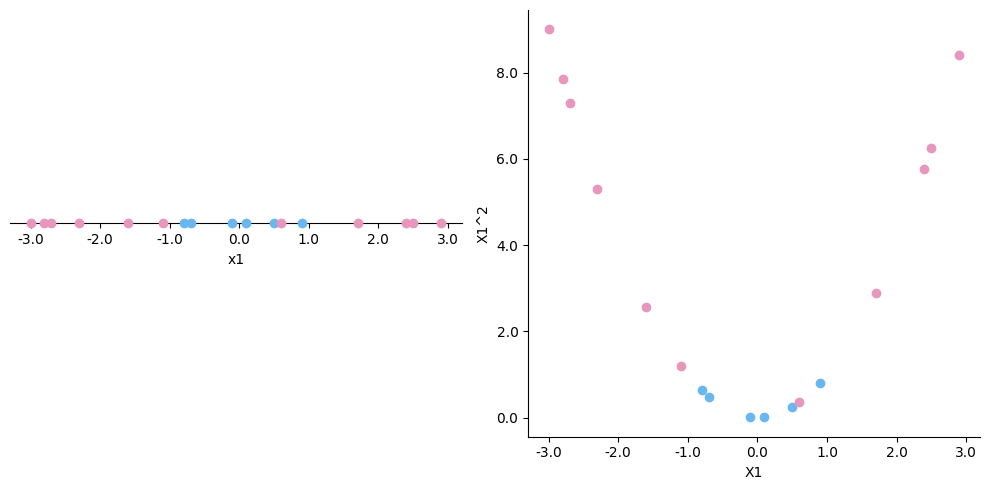

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

x5_class0 = np.load('.\\data\\x5_class0_data.npy') 
x5_class1 = np.load('.\\data\\x5_class1_data.npy') 

axes[0].scatter(x5_class0, np.zeros_like(x5_class0), color='#6ab6ef', label='Class 0', zorder=3)
axes[0].scatter(x5_class1, np.zeros_like(x5_class1), color='#e797bd', label='Class 1', zorder=3)
axes[0].set_xlabel('x1')
axes[0].set_yticks([]) 

axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes[0].spines['top'].set_visible(False)  
axes[0].spines['right'].set_visible(False) 
axes[0].spines['left'].set_visible(False)  
axes[0].spines['bottom'].set_position(('data', 0))
axes[0].spines['bottom'].set_zorder(0)

X = np.hstack((x5_class0, x5_class1))
y = np.hstack((np.zeros(len(x5_class0)), np.ones(len(x5_class1))))

X_transformed = np.column_stack((X, X**2))

axes[1].scatter(X_transformed[y == 0][:, 0], X_transformed[y == 0][:, 1], color='#6ab6ef', label='Class 0', zorder=3)
axes[1].scatter(X_transformed[y == 1][:, 0], X_transformed[y == 1][:, 1], color='#e797bd', label='Class 1', zorder=3)

axes[1].set_xlabel('X1')
axes[1].set_ylabel('X1^2')

axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes[1].spines['top'].set_visible(False)  
axes[1].spines['right'].set_visible(False)  

plt.tight_layout()
plt.show()


The figure above demonstrates that by applying a polynomial transformation $x^2$, the feature space of one-dimensional linearly inseparable data is expanded from $X_1$ to $X_1$ and $X_1^2$, thereby increasing the likelihood of linear separability.

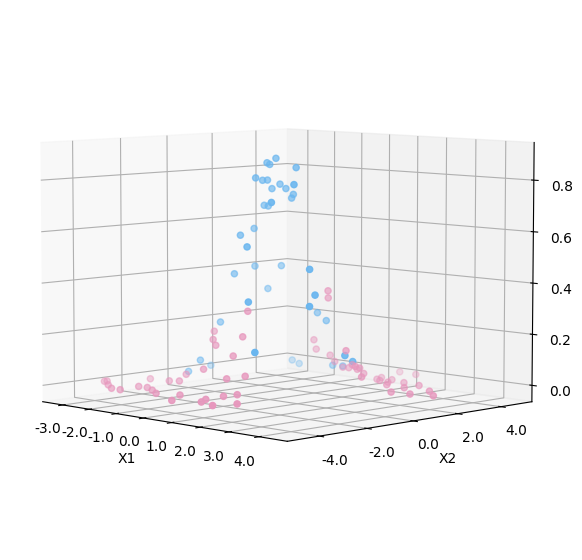

In [19]:
X = np.vstack((x4_class0, x4_class1))
y = np.hstack((np.zeros(len(x4_class0)), np.ones(len(x4_class1))))

def rbf_mapping(X, gamma):
    n_samples = X.shape[0]
    mapped_X = np.zeros((n_samples, 3))
    for i in range(n_samples):
        mapped_X[i, 0] = X[i, 0]
        mapped_X[i, 1] = X[i, 1]
        mapped_X[i, 2] = np.exp(-gamma * np.linalg.norm(X[i] - X.mean(axis=0))**2)
    return mapped_X

gamma = 0.5

X_mapped = rbf_mapping(X, gamma)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_mapped[y == 0][:, 0], X_mapped[y == 0][:, 1], X_mapped[y == 0][:, 2], color='#6ab6ef', label='Class 0')
ax.scatter(X_mapped[y == 1][:, 0], X_mapped[y == 1][:, 1], X_mapped[y == 1][:, 2], color='#e797bd', label='Class 1')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('RBF Value')

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.view_init(elev=6, azim=-45)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.show()

The figure above similarly illustrates the expansion of the feature space from two dimensions to three dimensions using a function, thereby enhancing the precondition for linear separability.

From the two examples above of expanding the feature space using functions, it is evident that there are numerous potential methods to extend the feature space. However, without careful consideration, we may end up with a large number of features, making computations unmanageable. For instance, using $x^2$ to expand the original $p$ features $X_1,X_2,...,X_p$ to $2p$ features $X_1,X_1^2,X_2,X_2^2,...,X_p,X_p^2$.

Next, we will introduce the support vector machine (SVM), which allows us to expand the feature space used by the support vector classifier in a computationally efficient manner.

#### Kernel Trick

The support vector classifier can be expressed as:
$$
f(\boldsymbol{x})=\beta_0+\sum_{i=1}^{n}\alpha_i\langle \boldsymbol{x},x_i\rangle
$$
where $x_i$ represents the training samples, and $\boldsymbol{x}$ represents the test sample. The sign of $f(\boldsymbol{x})$ determines which half-plane the sample belongs to, thereby completing the classification.

To compute the parameters $\beta_0,\alpha_1,...,\alpha_n$ of this function, it is necessary to calculate the inner products $\langle x_{i},x_{i'}\rangle$ for all combinations of training samples, requiring a total of $\binom{n}{2}=\frac{n(n-1)}{2}$ operations.

Based on the earlier analysis of support vectors, we know that only the support vectors contribute to the selection of the hyperplane, while other training samples do not. Let $S$ denote the set of support vectors. The function can then be rewritten as:
$$
f(\boldsymbol{x})=\beta_0+\sum_{i\in S}\alpha_i\langle \boldsymbol{x},x_i\rangle
$$
Compared to the original form, computing the coefficients now only requires considering $\langle x_{i},x_{i'}\rangle$ for $i,i'\in S$, significantly reducing the computational complexity.

We replace $\langle x_{i},x_{i'}\rangle$ with $K(x_{i},x_{i'})$, where $K$ is referred to as the kernel function. A kernel function quantifies the similarity between two observations. Below are three common kernel functions:

1. **Linear Kernel**:  
   $K(x_{i},x_{i'})=\sum_{j=1}^{p} x_{ij} x_{i'j}$, which is equivalent to the support vector classifier. It is called a linear kernel because the support vector classifier makes classification decisions based on linear combinations of features (i.e., $f(x)$ is a linear function in this case).

2. **Polynomial Kernel**:  
   $K(x_{i},x_{i'})=(1+\sum_{j=1}^{p} x_{ij} x_{i'j})^d$, where $d$ is the degree of the polynomial. When $d=1$, the polynomial kernel is equivalent to the support vector classifier; when $d>1$, it provides a more flexible decision boundary compared to the linear kernel. This effectively amounts to fitting a support vector classifier in a higher-dimensional feature space involving polynomials of degree $d$, rather than in the original feature space. When the support vector classifier is combined with a non-linear kernel, the resulting classifier is called a support vector machine (SVM).

3. **Radial Kernel**:  
   $K(x_{i},x_{i'})=\exp(-\gamma\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2)$. For a test sample $\boldsymbol{x^*}=(\boldsymbol{x_1^*},\boldsymbol{x_2^*},...,\boldsymbol{x_p^*})^T$, if its Euclidean distance from a training sample $x_i$ is large, the value of $K(\boldsymbol{x^*},x_i)$ will be very small due to the properties of the exponential function. This indicates that $x_i$ has minimal influence on $f(\boldsymbol{x^*})$. Thus, the radial kernel exhibits strong locality.

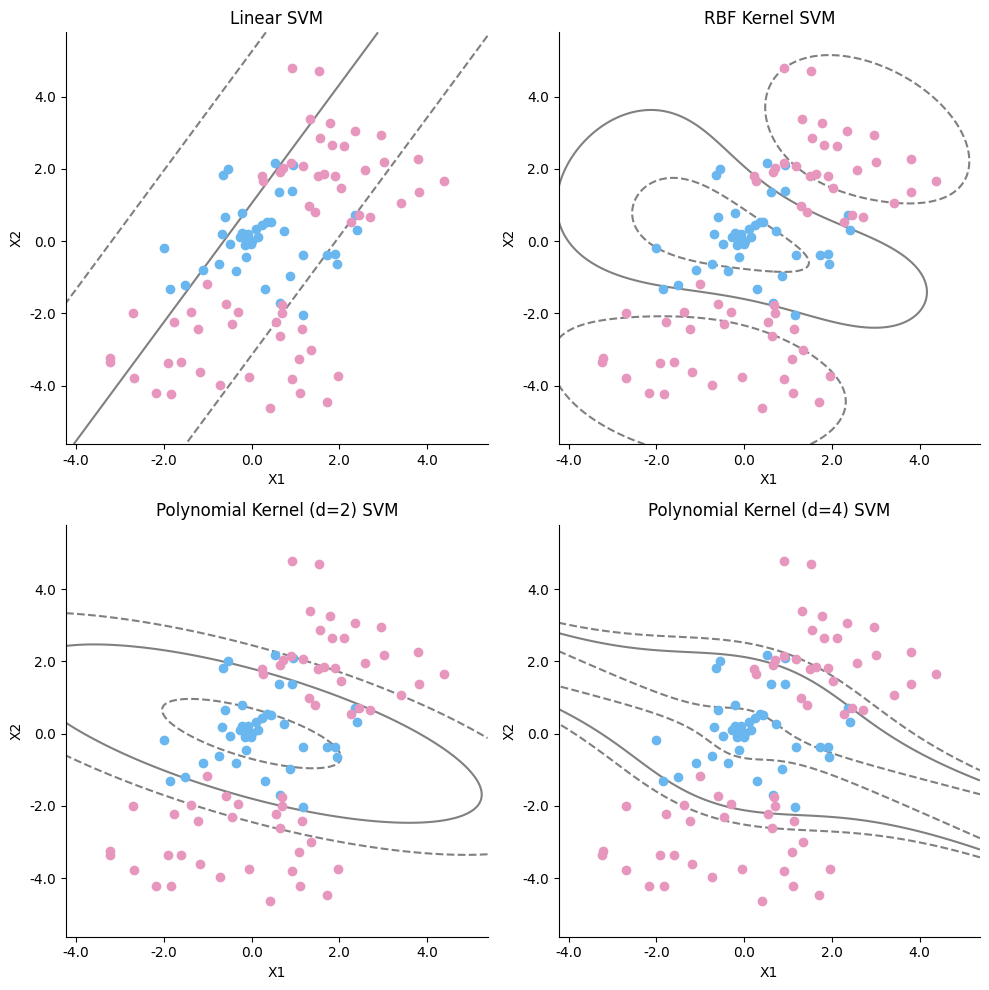

In [20]:
X = np.vstack((x4_class0, x4_class1))
y = np.hstack((np.zeros(len(x4_class0)), np.ones(len(x4_class1))))

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

models = [
    SVC(kernel='linear',C=100000),
    SVC(kernel='rbf'),
    SVC(kernel='poly', degree=2),
    SVC(kernel='poly', degree=4)
]

titles = [
    'Linear SVM',
    'RBF Kernel SVM',
    'Polynomial Kernel (d=2) SVM',
    'Polynomial Kernel (d=4) SVM'
]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

for col, model in enumerate(models):
    row, col_index = divmod(col, 2)

    model.fit(X, y)

    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[row, col_index].scatter(x4_class0[:, 0], x4_class0[:, 1], c='#6ab6ef', label='Class 0')
    axes[row, col_index].scatter(x4_class1[:, 0], x4_class1[:, 1], c='#e797bd', label='Class 1')

    axes[row, col_index].contour(xx, yy, Z, colors='grey', levels=[-1, 0, 1], linestyles=['--', '-', '--'], zorder=0)

    axes[row, col_index].set_xlabel('X1')
    axes[row, col_index].set_ylabel('X2')

    axes[row, col_index].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axes[row, col_index].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    axes[row, col_index].spines['top'].set_visible(False)
    axes[row, col_index].spines['right'].set_visible(False)

    axes[row, col_index].set_title(titles[col])

plt.tight_layout()
plt.show()

In many scenarios where support vector machines are used, the dimensionality of the expanded feature space can be extremely high, making direct computations intractable. However, by employing kernel functions, we can avoid explicit computations in high-dimensional or even infinite-dimensional feature spaces. Instead, we only need to compute the kernel function values $K(x_{i},x_{i'})$ between training samples. This approach effectively resolves the computational challenges.

#### Extended Applications

##### SVMs with More than Two Classes

The one-versus-all approach is an alternative procedure for applying SVMs one-versus-all in the case of $K$ > 2 classes. 

We fit $K$ SVMs, each time comparing one of the $K$ classes to the remaining $K − 1$ classes. 

##### Support Vector Regression

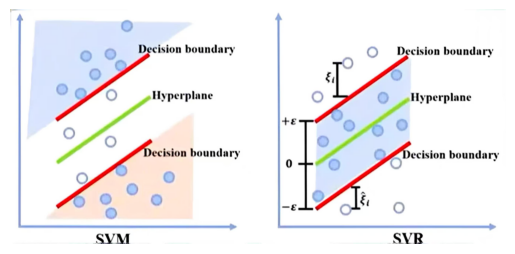

In [21]:
file_path = '.\\picture\\SVM and SVR.png'

img = Image.open(file_path)
plt.imshow(img)
plt.axis('off')
fig = plt.gcf()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Support Vector Regression (SVR) inherits some properties from the support vector classifier and can also handle non-linear regression problems using the kernel trick.

As shown in the figure above, SVR defines an error band with a width of $2\epsilon$, and penalties are imposed on all training samples that fall outside this band. Our goal is to find a regression function that includes as many sample data points as possible within the $2\epsilon$ error band.

To solve the linear regression function $f(\boldsymbol{x})=\boldsymbol{\beta}^T\boldsymbol{x}+\beta_0$, we first estimate the parameters $\boldsymbol{\beta}$ using the training sample data. We consider minimizing the following function:
$$
H(\boldsymbol{\beta},\beta_0)=\sum_{i=1}^{n}V(y_i-f(x_i))+\frac{\lambda}{2} ||\boldsymbol{\beta}||^2
$$
Here, $\frac{\lambda}{2} ||\boldsymbol{\beta}||^2$ is the regularization term to prevent overfitting, and $\lambda$ is the regularization coefficient.  
$V_\epsilon (r)$ is defined as:
$$
V_\epsilon (r)=
\begin{cases}
0 & \text{if } |r|<\epsilon \\
|r|-\epsilon, & \text{otherwise.}
\end{cases}
$$

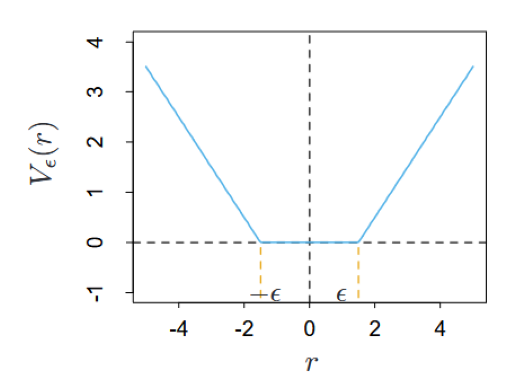

In [22]:
file_path = '.\\picture\\error measure.png'

img = Image.open(file_path)
plt.imshow(img)
plt.axis('off')
fig = plt.gcf()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In support vector classification, we focus only on the points near the decision boundary (i.e., the support vectors), while points far from the decision boundary that are correctly classified have no impact on the optimization process. Similarly, in regression problems, the $\epsilon$-insensitive loss function ignores points with small residuals and focuses only on those with larger errors.